# Play Tic-Tac-Toe Interactively (Simple Implementation)

To play interactively, you need to run the whole notebook in JupyterLab and scroll down.

## The board

I represent the board as a vector of length 9. The values are `' ', 'x', 'o'`.  

In [1]:
def empty_board():
    return [' '] * 9

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

### Helper functions

Show the board.

In [2]:
import numpy as np

def show_board_text(board):
    """display the board"""
    b = np.array(board).reshape((3,3))
    print(b)

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def show_board(board, help = True, dpi = 40, colors = {' ': 'white', 'x': 'red', 'o': 'black'}):
    """Show the tic-tac-toe-board. help adds the array index, dpi changes the sice and 
    colors sets the colors"""
    
    b = np.array(board).reshape((3,3))

    with plt.rc_context({'figure.dpi': dpi}):
        fig = plt.matshow(np.zeros((3, 3)), cmap = ListedColormap(['w']))
    fig.axes.axis('off')
    
    plt.hlines([.5, 1.5], -.5, 2.5)
    plt.vlines([.5, 1.5], -.5, 2.5)

    for row in range(3):
        for col in range(3):
            plt.text(row, col, b[col, row], 
                 fontsize = 64, 
                 color = colors[b[col, row]],
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
        
    if help:
        for row in range(3):
            for col in range(3):
                plt.text(col, row - .35, col + 3 * row, 
                     fontsize = 12, 
                     color = 'gray',
                     horizontalalignment = 'center',
                     verticalalignment = 'center')
        
        
    plt.show()

Determine if the current board/state has a winner.

In [4]:
def check_win(board):
    """check the board and return one of x, o, d (draw), or n (for next move)"""

    board = np.array(board).reshape((3,3))
   
    diagonals = np.array([[board[i][i] for i in range(len(board))], 
                          [board[i][len(board)-i-1] for i in range(len(board))]])
    
    for a_board in [board, np.transpose(board), diagonals]:
        for row in a_board:
            if len(set(row)) == 1 and row[0] != ' ':
                return row[0]

    # check for draw
    if(np.sum(board == ' ') < 1):
        return 'd'
    
    return 'n'

What are the possible actions given the current board?

In [5]:
def actions(board):
    """return possible actions as a vector of indices"""
    return np.where(np.array(board) == ' ')[0].tolist()

What is the new state after executing an action. 

In [6]:
def result(state, player, action):
    """Add move to the board."""
    
    state = state.copy()
    state[action] = player
  
    return state

## Implement an Interactive Game

### Baseline: Randomized Player

A completely randomized player agent can be used as a weak baseline. You could use a better player from the other examples.

In [7]:
def random_player(board, player = None):
    """Simple player that chooses a random empy square (equal probability of all permissible actions). 
    player is unused."""
    return np.random.choice(actions(board))

### The Environment

Implement the environment that calls the agent. The percept is the board and the action is move.

In [8]:
def switch_player(player, x, o):
    if player == 'x':
        return 'o', o
    else:
        return 'x', x

def play(x, o, N = 1, show_final_board = False):
    """Let two agents play each other N times. x starts. x and y are agent functions that 
    get the board as the percept and return their next action."""
    results = {'x': 0, 'o': 0, 'd': 0}
    
    for i in range(N):
        board = empty_board()
        player, fun = 'x', x
        
        while True:
            a = fun(board, player)
            board = result(board, player, a)
            
            win = check_win(board)   # returns the 'n' if the game is not done.
            if win != 'n':
                results[win] += 1
                if show_final_board: 
                    print(f'The winner is {win}. Final board:')
                    show_board(board)
                break
            
            player, fun = switch_player(player, x, o)   
    
    return results

### Interactive Player

Implement the interactive player. It shows the board and asks you for the move.

In [9]:
from IPython.display import clear_output

def interactive_player(board, player = None):
    clear_output(wait = False)
    show_board(board, help = True)
    
    available = actions(board)
    print(f'Available actions are: {available}')

    retry = True
    while retry:
        try:
            move = int(input("Your move:\n"))
            if move in available:
                retry = False
            else:
                raise ValueError()
        except ValueError:
            print("Please enter a valid move.")

    return(move)

## Start an interactive game as x

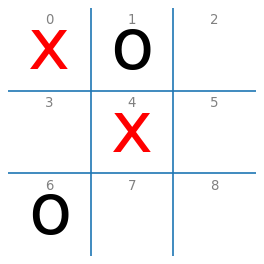

Available actions are: [2, 3, 5, 7, 8]


Your move:
 8


The winner is x. Final board:


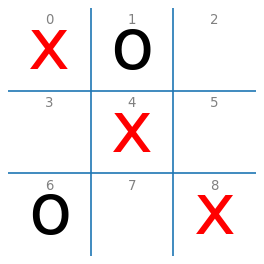

{'x': 1, 'o': 0, 'd': 0}

In [10]:
play(interactive_player, random_player, show_final_board=True)

### Start an interactive game as o

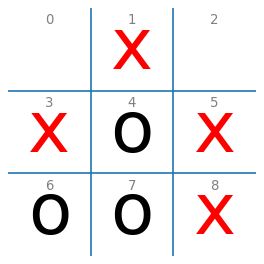

Available actions are: [0, 2]


Your move:
 0


The winner is x. Final board:


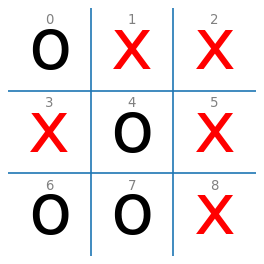

{'x': 1, 'o': 0, 'd': 0}

In [11]:
play(random_player, interactive_player, show_final_board=True)